# Marketing Campaign Project

## Importing the required libraries

In [888]:
from pathlib import Path # to interact with file system.

import numpy as np # for working with arrays.
import pandas as pd # for working with data frames (tables).

from sklearn.model_selection import train_test_split # for data partition.
from sklearn.metrics import r2_score # to identify r_squared for regression model.
from sklearn.linear_model import LinearRegression # for linear regression model. 

import statsmodels.formula.api as sm

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from mord import LogisticIT
from dmba import classificationSummary, gainsChart, liftChart

%matplotlib inline 
import matplotlib.pylab as plt # for building and showing graphs.

## Uploading the data for analysis - Exploring, cleaning and pre-processing the data

### Uploading the dataset and creating marketing_df dataframe

In [889]:
# Create a deta frame in Python using WestRoxbury.csv file.
marketing_df = pd.read_csv('marketing_campaign.csv', delimiter='\t')

In [890]:
# Determine and display dimensions of data frame. 
print('Number of rows and columns in data set:', 
      marketing_df.shape )
# It has 5802 rows and 14 columns.

Number of rows and columns in data set: (2240, 29)


In [891]:
# Display the first 5 rows of the dataframe. 
marketing_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [892]:
# Display the column names.
print('Original column titles:')
marketing_df.columns

Original column titles:


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [893]:
# We therefore strip trailing spaces and replace the remaining spaces 
# with an underscore '_'. Instead of using the `rename` method, we 
# create a modified copy of `columns` and assign to the `columns` 
# field of the dataframe.
print('Modified column titles with no space and one word for titles:')
marketing_df.columns = [s.strip().replace(' ', '_') for s in marketing_df.columns]
marketing_df.columns

Modified column titles with no space and one word for titles:


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [894]:
# Display column data types. 
marketing_df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [895]:
# create a list of columns to drop
cols_to_drop = ['Z_CostContact', 'Z_Revenue', 'ID', 'Dt_Customer']

# drop the columns from the DataFrame
marketing_df.drop(cols_to_drop, axis=1, inplace=True)


In [896]:
# Change Year_Birth to Age (Age is more informative)
marketing_df['Age'] = 2023 - marketing_df.Year_Birth.to_numpy()
marketing_df = marketing_df.drop('Year_Birth', axis=1)

In [897]:
## Checking the number of columns

marketing_df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age'],
      dtype='object')

In [898]:
## Replacing certain values in the 'Marital_Status' column with 'Single', ensuring data consistency. 
marketing_df['Marital_Status'] = marketing_df['Marital_Status'].replace(['Alone','YOLO','Absurd'],'Single')

In [899]:
## Counting the values in Education
marketing_df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [900]:
## Replacing certain values in the 'Marital_Status' column with 'Single', ensuring data consistency.
marketing_df['Education'].replace(['2n Cycle', 'Graduation'], ['Master', 'Bachelor'], inplace=True)

In [901]:
marketing_df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,Bachelor,Single,58138.0,0,0,58,635,88,546,172,...,4,7,0,0,0,0,0,0,1,66
1,Bachelor,Single,46344.0,1,1,38,11,1,6,2,...,2,5,0,0,0,0,0,0,0,69
2,Bachelor,Together,71613.0,0,0,26,426,49,127,111,...,10,4,0,0,0,0,0,0,0,58
3,Bachelor,Together,26646.0,1,0,26,11,4,20,10,...,4,6,0,0,0,0,0,0,0,39
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,6,5,0,0,0,0,0,0,0,42


In [902]:
## Displaying the number of rows and columns after some data cleaning
marketing_df.shape

(2240, 25)

In [903]:
## Displaying the statistics of the data
marketing_df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,54.194196
std,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,11.984069
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000
25%,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
50%,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000
75%,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,130.000000


In [904]:
# fill missing values with mean income
marketing_df['Income'].fillna(marketing_df['Income'].mean(), inplace=True)

# convert income to thousands of dollars
marketing_df['Income'] /= 1000

In [905]:
## Describing the data again to see the consistency 
marketing_df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52.247251,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,54.194196
std,25.037797,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,11.984069
min,1.730000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000
25%,35.538750,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
50%,51.741500,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000
75%,68.289750,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.000000
max,666.666000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,130.000000


## Removing the outliers for reducing the number of predictors

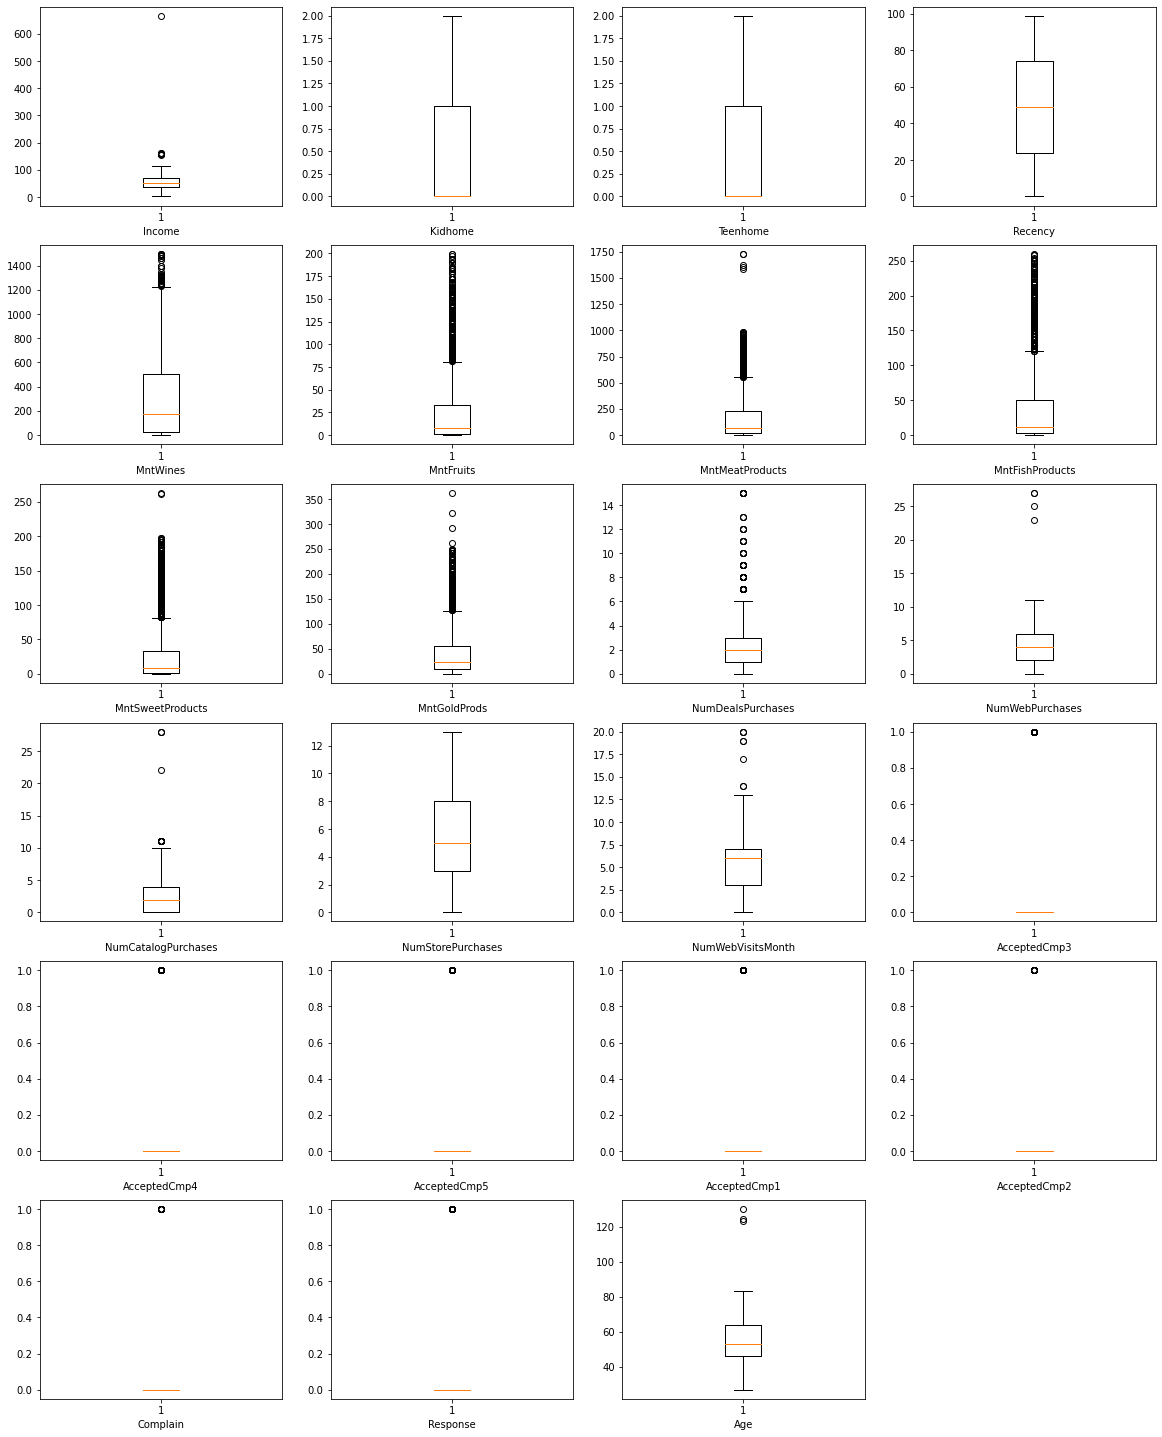

In [906]:
# plot all numerical columns (14)
num_coln = marketing_df.select_dtypes(include=np.number).columns.tolist()
bins=10
j=1
fig = plt.figure(figsize = (20, 30))
for i in num_coln:
    plt.subplot(7,4,j)
    plt.boxplot(marketing_df[i])
    j=j+1
    plt.xlabel(i)
    # plt.legend(i)
plt.show()

In [907]:
## Removing rows from the DataFrame "marketing_df" where income is greater than 200 or age is greater than 100. 
marketing_df.drop(marketing_df[(marketing_df['Income']>200)|(marketing_df['Age']>100)].index,inplace=True)

## Plotting all the numerical values

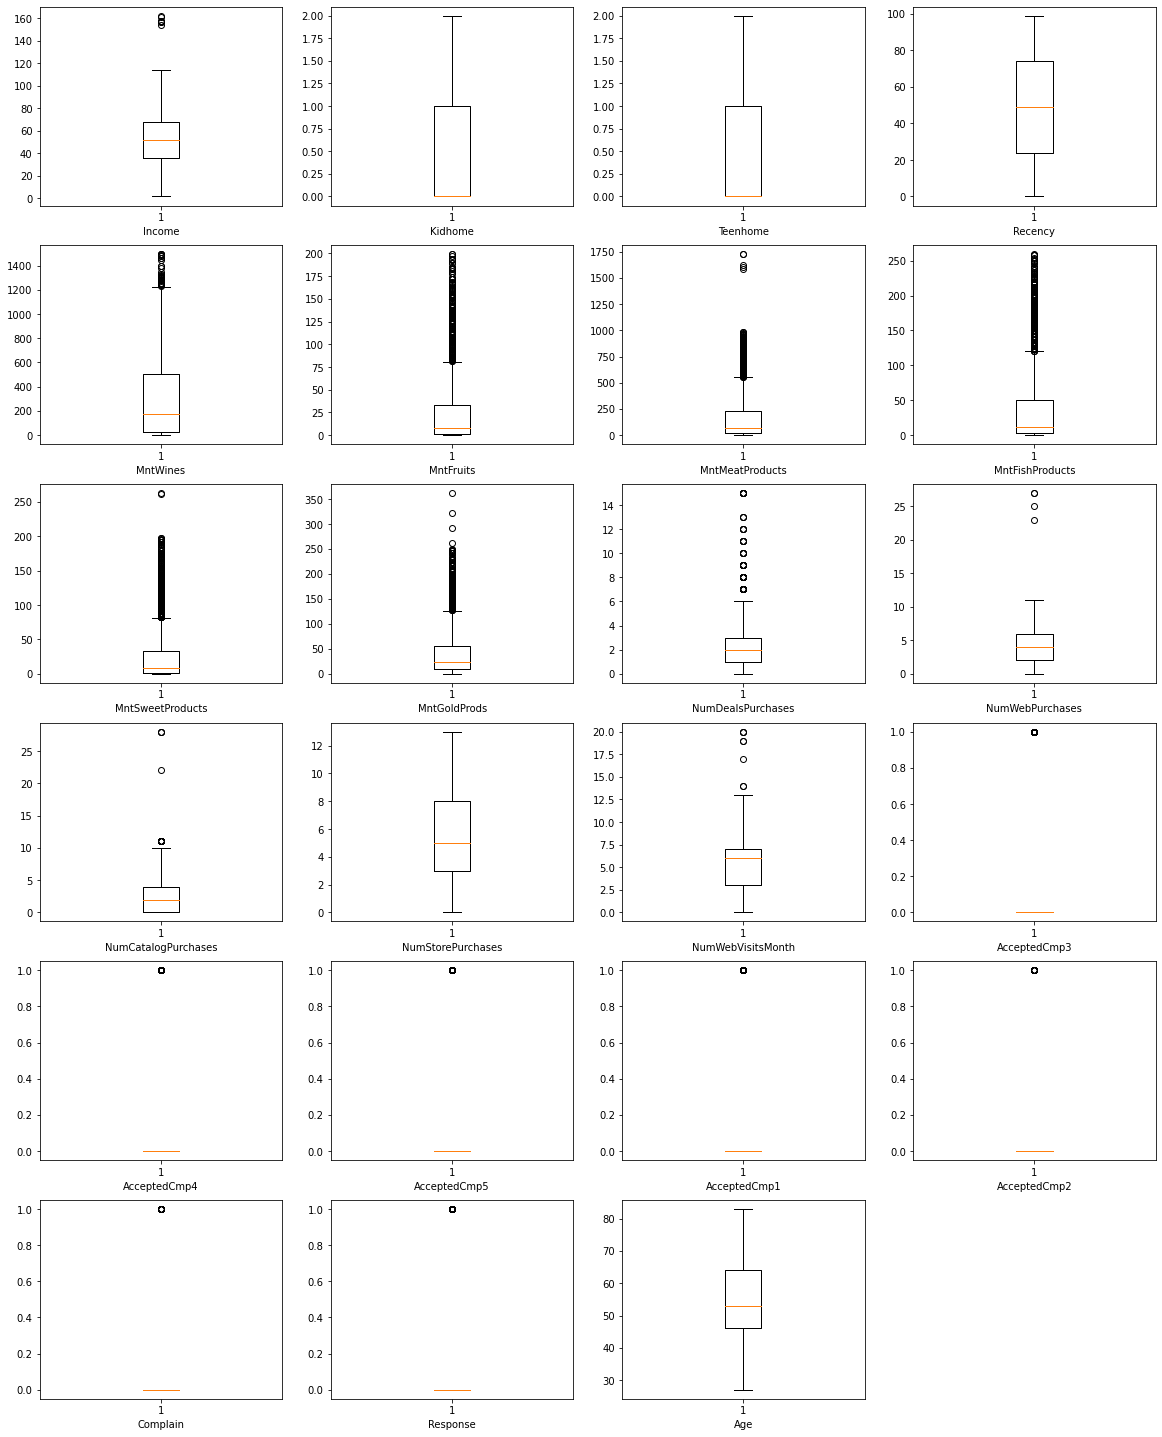

In [908]:
# plot all numerical columns (14)
num_coln = marketing_df.select_dtypes(include=np.number).columns.tolist()
bins=10
j=1
fig = plt.figure(figsize = (20, 30))
for i in num_coln:
    plt.subplot(7,4,j)
    plt.boxplot(marketing_df[i])
    j=j+1
    plt.xlabel(i)
    # plt.legend(i)
plt.show()

## Converting the categorical variable into dummy variable

In [909]:
# Convert category variable REMODEL into dummy variables, 
# REMODEL_Old and REMODEL_Recent. 
# Use drop_first=True to drop the first dummy variable for 'None'.
marketing_df = pd.get_dummies(marketing_df, prefix_sep='_', 
                            drop_first=True)
marketing_df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Education_Basic',
       'Education_Master', 'Education_PhD', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow'],
      dtype='object')

In [910]:
# Display the first 5 rows of the dataframe. 
marketing_df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Complain,Response,Age,Education_Basic,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,58.138,0,0,58,635,88,546,172,88,88,...,0,1,66,0,0,0,0,1,0,0
1,46.344,1,1,38,11,1,6,2,1,6,...,0,0,69,0,0,0,0,1,0,0
2,71.613,0,0,26,426,49,127,111,21,42,...,0,0,58,0,0,0,0,0,1,0
3,26.646,1,0,26,11,4,20,10,3,5,...,0,0,39,0,0,0,0,0,1,0
4,58.293,1,0,94,173,43,118,46,27,15,...,0,0,42,0,0,1,1,0,0,0


In [911]:
## Describing the dataset
marketing_df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Complain,Response,Age,Education_Basic,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.00000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,...,2236.000000,2236.000000,2236.000000,2236.00000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,51.961907,0.444097,0.506708,49.116279,304.12746,26.275939,166.983453,37.536225,27.080501,43.983005,...,0.008945,0.149374,54.101968,0.02415,0.255367,0.216905,0.386404,0.217352,0.258497,0.034436
std,21.411405,0.538459,0.544609,28.957284,336.59181,39.724007,225.689645,54.648562,41.299504,52.061568,...,0.094173,0.356536,11.703281,0.15355,0.436165,0.412230,0.487034,0.412537,0.437907,0.182388
min,1.730000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,27.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.502500,0.000000,0.000000,24.000000,24.00000,1.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,46.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.684000,0.000000,0.000000,49.000000,174.00000,8.000000,67.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,53.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68.275750,1.000000,1.000000,74.000000,504.25000,33.000000,232.000000,50.000000,33.000000,56.000000,...,0.000000,0.000000,64.000000,0.00000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,162.397000,2.000000,2.000000,99.000000,1493.00000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,1.000000,1.000000,83.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [912]:
## Determining the number of rows and columns after exploring, cleanin and preprocessing the dataset
marketing_df.shape

(2236, 30)

In [913]:
# Create predictors X and outcome y variables.
X = marketing_df.drop(columns=['Response'])
y = marketing_df['Response']

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the bank_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.4, random_state=1)

## Using Backward Elimination Method to find best predictors

In [914]:
# Define train_model() function used in Backward Elimination
# algorithm with backward_elimination() function. 
def train_model(variables):
    model = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
    model.fit(train_X[variables], train_y)
    return model

# Define score_model() function used in Backward Elimination
# algorithm with backward_elimination() function. 
def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

# Use backward_elimination() function to identify the
# best_model and best_variables. 
best_model_be, best_variables_be = backward_elimination(train_X.columns, 
                        train_model, score_model, verbose=True)

# Display best variables based on Backward Elimination algorithm. 
print()
print('Best Variables from Backward Elimination Algorithm')
print(best_variables_be)

Variables: Income, Kidhome, Teenhome, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Age, Education_Basic, Education_Master, Education_PhD, Marital_Status_Married, Marital_Status_Single, Marital_Status_Together, Marital_Status_Widow
Start: score=742.69
Step: score=722.83, remove NumCatalogPurchases
Step: score=692.46, remove AcceptedCmp4
Step: score=692.46, remove None

Best Variables from Backward Elimination Algorithm
['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Age', 'Education_Basic', 'Education_Master', 'Edu

## Developed the logistic regression model based on backward elimination

In [915]:
# Develop the logistic regression model based
# on the Backward Elimination results.
# Create predictors X and outcome y variables.
X = marketing_df.drop(columns=['NumCatalogPurchases', 'AcceptedCmp4', 'Response'])

y = marketing_df['Response']

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the bank_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.4, random_state=1)

# Using LogisticRegression() function, fit multiple predictors logistic 
# regression for training partition. Set penalty='l2' for regularization. 
# Regularization is any modification to a learning algorithm that is 
# intended to reduce its generalization error but not its training error.
# Regularization can be used to train models that generalize 
# better on unseen data by preventing the algorithm from overfitting 
# the training data set.
# solver='liblinear' is used for automated selection of the best parameters.
log_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
log_reg.fit(train_X, train_y)

# Show intercept and coefficients of the multiple predictors' logistic model.
print('Parameters of Logistic Regresion Model with Multiple Predictors')
print('Intercept:', np.round(log_reg.intercept_[0], decimals=3))
print('Coefficients for Predictors')
print(pd.DataFrame({'Coeff:': np.round(log_reg.coef_[0], decimals=3)}, 
                    index=X.columns).transpose())



Parameters of Logistic Regresion Model with Multiple Predictors
Intercept: -2.084
Coefficients for Predictors
        Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
Coeff:  -0.004    0.403    -0.981   -0.032     0.001        0.0   

        MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
Coeff:            0.002           -0.001            -0.001         0.003  ...   

        AcceptedCmp2  Complain    Age  Education_Basic  Education_Master  \
Coeff:         1.337    -0.793  0.003           -2.855             0.431   

        Education_PhD  Marital_Status_Married  Marital_Status_Single  \
Coeff:          0.779                  -1.215                 -0.106   

        Marital_Status_Together  Marital_Status_Widow  
Coeff:                   -1.194                 0.491  

[1 rows x 27 columns]


In [916]:
# Make predictions for validation set using multiple
# predictors logistic regression model. 

# Predict multiple predictors logistic model's results 
# (0 or 1) for validation set.
log_pred = log_reg.predict(valid_X)

# Predict multiple predictors logistic model's probabilities 
# p(0) and p(1) for validation set.
log_prob = np.round(log_reg.predict_proba(valid_X), decimals=4)

# Create data frame to show multiple predictors logistic
# model results for validation set. 
log_result = pd.DataFrame({'Actual': valid_y, 
                    'Classification': log_pred,
                    'p(0)': [p[0] for p in log_prob],
                    'p(1)': [p[1] for p in log_prob]
})

print('Classification for Validation Partition')
print(log_result.head(20))


Classification for Validation Partition
      Actual  Classification    p(0)    p(1)
664        0               0  0.9918  0.0082
1596       0               0  0.9923  0.0077
1120       0               0  0.9176  0.0824
575        1               0  0.5984  0.4016
674        0               0  0.9372  0.0628
1815       0               0  0.9712  0.0288
2200       0               0  0.9959  0.0041
196        0               0  0.9926  0.0074
828        0               0  0.8908  0.1092
120        0               0  0.9915  0.0085
1657       0               0  0.9935  0.0065
528        0               1  0.4956  0.5044
351        0               1  0.3774  0.6226
195        0               0  0.9688  0.0312
126        1               0  0.6291  0.3709
2185       0               0  0.9550  0.0450
1349       1               0  0.9549  0.0451
1267       0               0  0.9891  0.0109
1328       0               1  0.2404  0.7596
770        0               0  0.9741  0.0259


In [917]:
# Confusion matrices for multiple predictors logistic model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, log_reg.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, log_reg.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.9023)

       Prediction
Actual    0    1
     0 1125   28
     1  103   85

Validation Partition
Confusion Matrix (Accuracy 0.8670)

       Prediction
Actual   0   1
     0 724  25
     1  94  52


## Using Forward Selection Method using Logistic Regression

In [918]:
# Create predictors X and outcome y variables.
X = marketing_df.drop(columns=['Response'])
y = marketing_df['Response']

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the bank_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.4, random_state=1)

In [919]:
X

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp2,Complain,Age,Education_Basic,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,58.138,0,0,58,635,88,546,172,88,88,...,0,0,66,0,0,0,0,1,0,0
1,46.344,1,1,38,11,1,6,2,1,6,...,0,0,69,0,0,0,0,1,0,0
2,71.613,0,0,26,426,49,127,111,21,42,...,0,0,58,0,0,0,0,0,1,0
3,26.646,1,0,26,11,4,20,10,3,5,...,0,0,39,0,0,0,0,0,1,0
4,58.293,1,0,94,173,43,118,46,27,15,...,0,0,42,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61.223,0,1,46,709,43,182,42,118,247,...,0,0,56,0,0,0,1,0,0,0
2236,64.014,2,1,56,406,0,30,0,0,8,...,0,0,77,0,0,1,0,0,1,0
2237,56.981,0,0,91,908,48,217,32,12,24,...,0,0,42,0,0,0,0,0,0,0
2238,69.245,0,1,8,428,30,214,80,30,61,...,0,0,67,0,1,0,0,0,1,0


In [920]:
# Define train_model() function used in Forward Selection
# algorithm with forward_selection() function. 
# The initial model is the constant model - this requires 
# special handling in train_model and score_model.
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
    model.fit(train_X[variables], train_y)
    return model

# Define score_model() function used in Forward Selection
# algorithm with forward_selection() function. 
def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

# Use forward_selection() function to identify the
# best_model and best_variables.
best_model_fs, best_variables_fs = forward_selection(train_X.columns, 
                    train_model, score_model, verbose=True)

# Display best variables based on Forward Selection algorithm.
print()
print('Best Variables from Forward Selection Algorithm')
print(best_variables_fs)

Variables: Income, Kidhome, Teenhome, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Age, Education_Basic, Education_Master, Education_PhD, Marital_Status_Married, Marital_Status_Single, Marital_Status_Together, Marital_Status_Widow
Start: score=972.34, constant
Step: score=972.34, add None

Best Variables from Forward Selection Algorithm
[]


## Stepwise Method using logistic regression

In [921]:
# Create predictors X and outcome y variables.
X = marketing_df.drop(columns=['Response'])
y = marketing_df['Response']

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the bank_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.4, random_state=1)

In [922]:
# Define train_model() function used in Stepwise Selection
# algorithm with stepwise_selection() function. 
# The initial model is the constant model - this requires 
# special handling in train_model and score_model.
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
    model.fit(train_X[variables], train_y)
    return model

# Define score_model() function used in Stepwise Selection
# algorithm with stepwise_selection() function. 
def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

# Use stepwise() function to identify the best_model
# and best_variables with Stepwise section algorithm.
best_model_st, best_variables_st = stepwise_selection(train_X.columns, 
                    train_model, score_model, verbose=True)

# Display best variables based on Stepwise algorithm.
print()
print('Best Variables from Stepwise Selection Algorithm')
print(best_variables_st)

Variables: Income, Kidhome, Teenhome, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Age, Education_Basic, Education_Master, Education_PhD, Marital_Status_Married, Marital_Status_Single, Marital_Status_Together, Marital_Status_Widow
Start: score=972.34, constant
Step: score=972.34, unchanged None

Best Variables from Stepwise Selection Algorithm
[]


## Logistic Regression using all variables

In [923]:
# Develop the logistic regression model based
# on the Backward Elimination results.
# Create predictors X and outcome y variables.
X = marketing_df.drop(columns=['Response'])

y = marketing_df['Response']

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the bank_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.4, random_state=1)

# Using LogisticRegression() function, fit multiple predictors logistic 
# regression for training partition. Set penalty='l2' for regularization. 
# Regularization is any modification to a learning algorithm that is 
# intended to reduce its generalization error but not its training error.
# Regularization can be used to train models that generalize 
# better on unseen data by preventing the algorithm from overfitting 
# the training data set.
# solver='liblinear' is used for automated selection of the best parameters.
log_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
log_reg.fit(train_X, train_y)

# Show intercept and coefficients of the multiple predictors' logistic model.
print('Parameters of Logistic Regresion Model with Multiple Predictors')
print('Intercept:', np.round(log_reg.intercept_[0], decimals=3))
print('Coefficients for Predictors')
print(pd.DataFrame({'Coeff:': np.round(log_reg.coef_[0], decimals=3)}, 
                    index=X.columns).transpose())


Parameters of Logistic Regresion Model with Multiple Predictors
Intercept: -2.073
Coefficients for Predictors
        Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
Coeff:  -0.008    0.463    -0.964   -0.032     0.001      0.001   

        MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
Coeff:            0.002           -0.001            -0.001         0.003  ...   

        AcceptedCmp2  Complain    Age  Education_Basic  Education_Master  \
Coeff:          1.06    -0.805  0.003           -2.965             0.433   

        Education_PhD  Marital_Status_Married  Marital_Status_Single  \
Coeff:          0.826                  -1.228                 -0.129   

        Marital_Status_Together  Marital_Status_Widow  
Coeff:                    -1.22                 0.412  

[1 rows x 29 columns]


In [924]:
# Make predictions for validation set using multiple
# predictors logistic regression model. 

# Predict multiple predictors logistic model's results 
# (0 or 1) for validation set.
log_pred = log_reg.predict(valid_X)

# Predict multiple predictors logistic model's probabilities 
# p(0) and p(1) for validation set.
log_prob = np.round(log_reg.predict_proba(valid_X), decimals=4)

# Create data frame to show multiple predictors logistic
# model results for validation set. 
log_result = pd.DataFrame({'Actual': valid_y, 
                    'Classification': log_pred,
                    'p(0)': [p[0] for p in log_prob],
                    'p(1)': [p[1] for p in log_prob]
})

print('Classification for Validation Partition')
print(log_result.head(20))


Classification for Validation Partition
      Actual  Classification    p(0)    p(1)
664        0               0  0.9923  0.0077
1596       0               0  0.9928  0.0072
1120       0               0  0.9204  0.0796
575        1               0  0.5632  0.4368
674        0               0  0.9438  0.0562
1815       0               0  0.9707  0.0293
2200       0               0  0.9961  0.0039
196        0               0  0.9940  0.0060
828        0               0  0.8981  0.1019
120        0               0  0.9923  0.0077
1657       0               0  0.9937  0.0063
528        0               1  0.4812  0.5188
351        0               1  0.4031  0.5969
195        0               0  0.9684  0.0316
126        1               0  0.6395  0.3605
2185       0               0  0.9137  0.0863
1349       1               0  0.9595  0.0405
1267       0               0  0.9893  0.0107
1328       0               1  0.2223  0.7777
770        0               0  0.9762  0.0238


In [925]:
# Confusion matrices for multiple predictors logistic model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, log_reg.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, log_reg.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.8986)

       Prediction
Actual    0    1
     0 1121   32
     1  104   84

Validation Partition
Confusion Matrix (Accuracy 0.8704)

       Prediction
Actual   0   1
     0 725  24
     1  92  54


In [926]:
from pathlib import Path # to interact with file system.

import numpy as np # for working with arrays.
import pandas as pd # for working with data frames (tables).

from sklearn.model_selection import train_test_split # for data partition.
from sklearn.metrics import r2_score # to identify r_squared for regression model.
from sklearn.linear_model import LinearRegression # for linear regression model. 

import statsmodels.formula.api as sm

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from mord import LogisticIT
from dmba import classificationSummary, gainsChart, liftChart

%matplotlib inline 
import matplotlib.pylab as plt # for building and showing graphs.

In [927]:
from pathlib import Path

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from dmba import plotDecisionTree, classificationSummary, regressionSummary

%matplotlib inline   
import matplotlib.pylab as plt

# Full Grown classification tree and confusion matrix.

In [928]:
X = marketing_df.drop(columns=['Response'])

y = marketing_df['Response']

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the bank_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.4, random_state=1)
# Develop training (60%) and validation(40% or 0.4) partitions for
# UniversalBank data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)


In [929]:
 #Please install library pydotplus & graphviz & use this command as well : conda install graphviz after installing both packages
from pathlib import Path

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from dmba import plotDecisionTree, classificationSummary, regressionSummary

%matplotlib inline                                 
import matplotlib.pylab as plt
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import collections

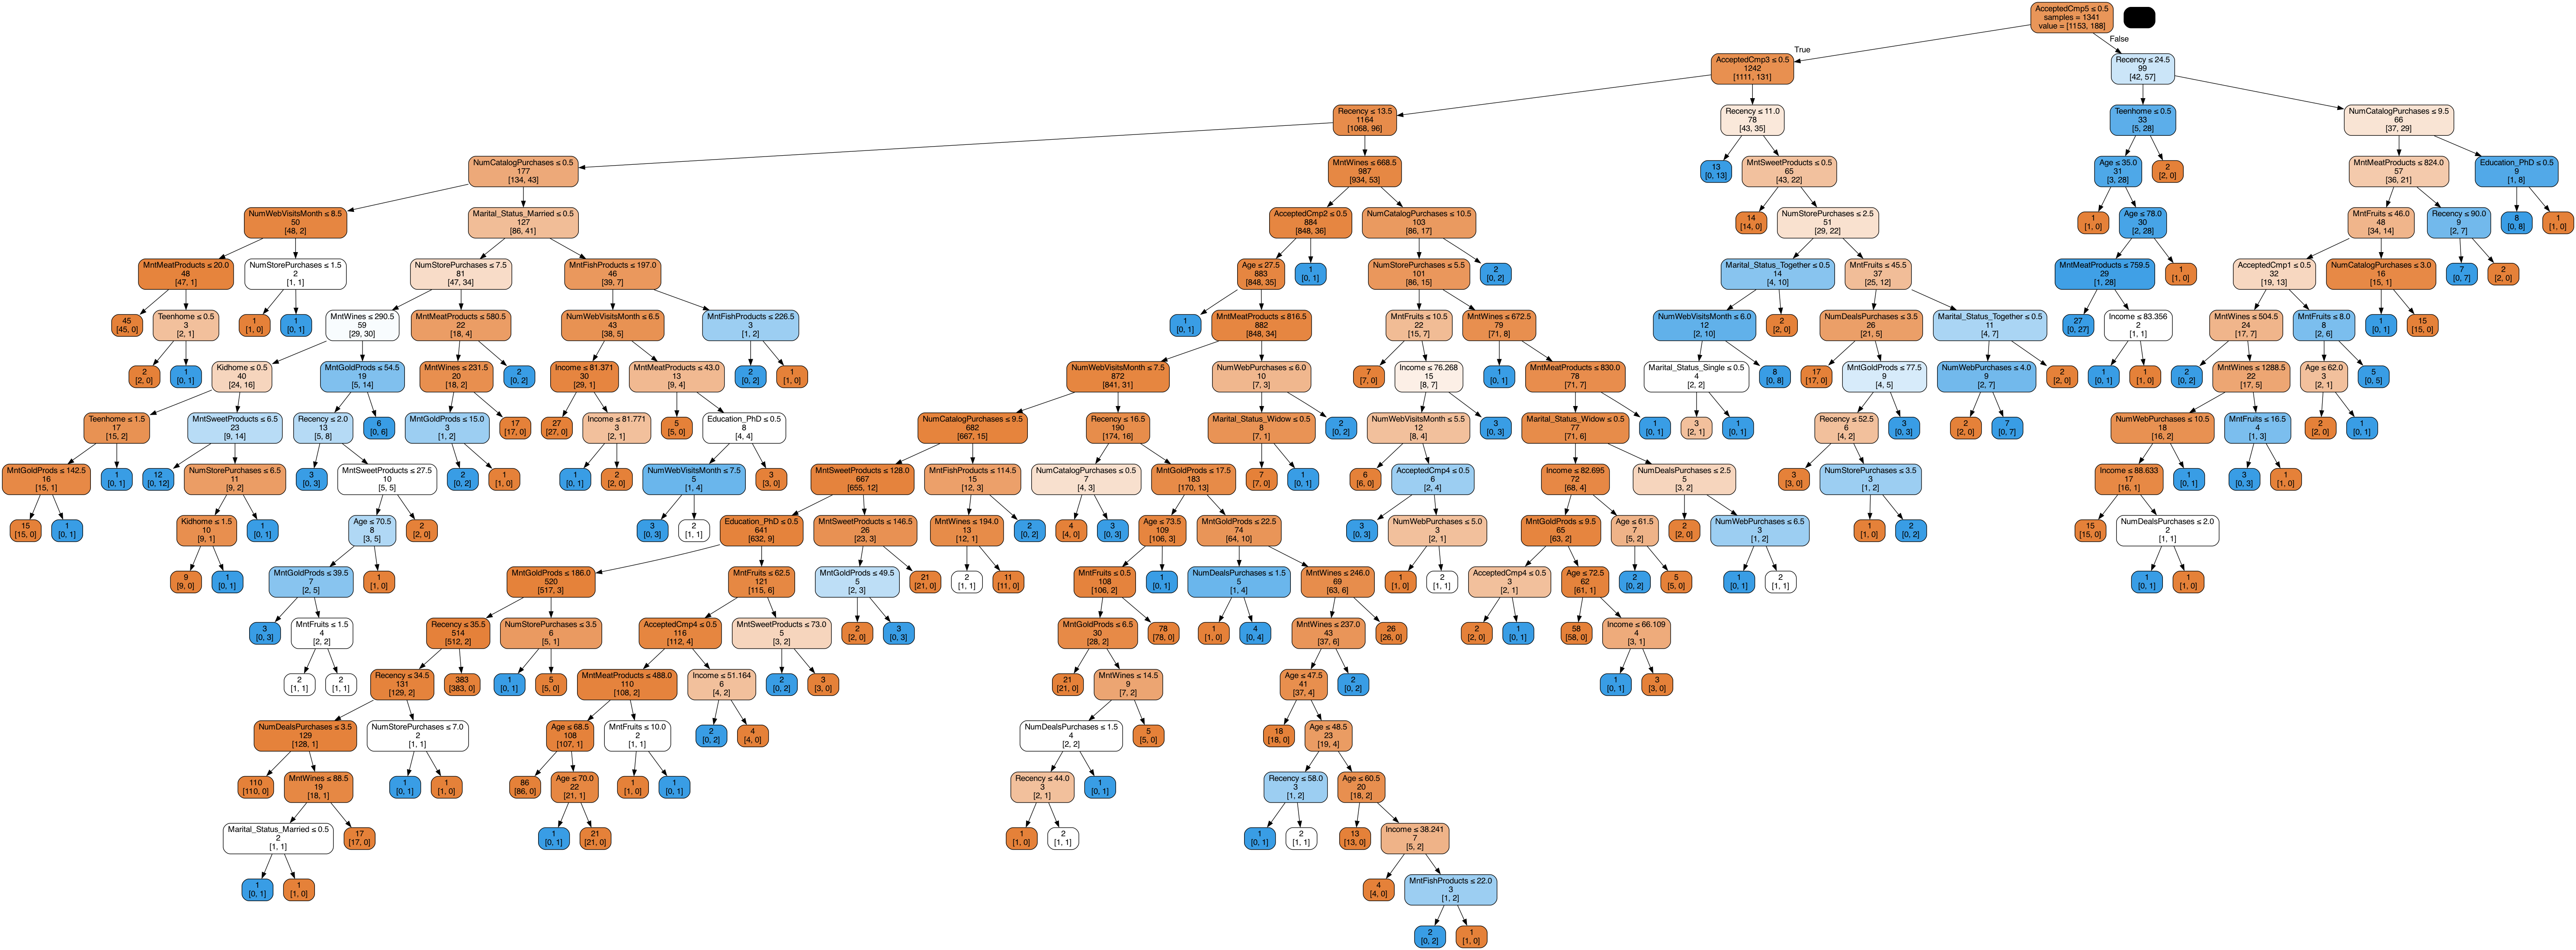

In [930]:
# Grow full classification tree using training partition.
fullClassTree = DecisionTreeClassifier()
fullClassTree.fit(train_X, train_y)

# Using plotDecisionTree() to visualize the full tree.
plotDecisionTree(fullClassTree, feature_names=train_X.columns)

In [931]:
# Indetify and display number of nodes in the tree.
tree_nodes = fullClassTree.tree_.node_count
print('Number of nodes:', tree_nodes)

Number of nodes: 271


In [932]:
# Confusion matrices for full classification tree. 

# Identify  and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, fullClassTree.predict(train_X))

# Identify  and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, fullClassTree.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.9933)

       Prediction
Actual    0    1
     0 1153    0
     1    9  179

Validation Partition
Confusion Matrix (Accuracy 0.8201)

       Prediction
Actual   0   1
     0 668  81
     1  80  66


# Five-fold cross-validation of classification tree

In [933]:
# Five-fold cross-validation of the full decision tree classifier.
# Develop full classification tree.  
treeClassifier = DecisionTreeClassifier()

# Use cross_val_score() function to identify performance 
# accuracy for 5 folds (cv=5) of cross-validation partitioning.
scores = cross_val_score(treeClassifier, train_X, train_y, cv=5)

# Display performance accuracy scores for each fold partition.
# Use three decimals (.3f) for each accuracy score using the 
# acc (accumulator) parameter. 
print('Performance Accuracy of 5-Fold Cross-Validation')
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])

# Indetify and display two standard deviation confidence interval for 
# population mean scores.
print()
print('Two Standard Deviation (95%) Confidence Interval for Mean Accuracy')
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')

Performance Accuracy of 5-Fold Cross-Validation
Accuracy scores of each fold:  ['0.840', '0.851', '0.851', '0.840', '0.866']

Two Standard Deviation (95%) Confidence Interval for Mean Accuracy
Accuracy: 0.849 (+/- 0.019)


# Smaller classification tree using DecisionTreeClassifier() control parameters.

Small Classification Tree with Control Parameters


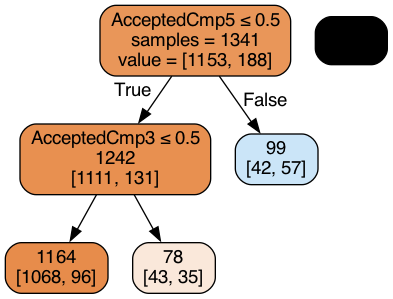

In [934]:
# Create a smaller classification tree for training partition
# using DecisionTreeClassifier() function control parameters:
#  - Maximum Tree depth (number of splits) = 30;
#  - Minimum impurity decrease per split = 0.01 
#  - Minimum number of sample records in a node for splitting = 20.   
smallClassTree = DecisionTreeClassifier(max_depth=30, 
        min_impurity_decrease=0.01, min_samples_split=20)
smallClassTree.fit(train_X, train_y)

# Display classification tree for training partition.
print('Small Classification Tree with Control Parameters')
plotDecisionTree(smallClassTree, feature_names=train_X.columns)

In [935]:
# Confusion matrices for smaller classification tree. 

# Identify  and display confusion matrix for training partition. 
print('Training Partition for Smaller Tree')
classificationSummary(train_y, smallClassTree.predict(train_X))

# Identify  and display confusion matrix for validation partition. 
print()
print('Validation Partition for Smaller Tree')
classificationSummary(valid_y, smallClassTree.predict(valid_X))

Training Partition for Smaller Tree
Confusion Matrix (Accuracy 0.8710)

       Prediction
Actual    0    1
     0 1111   42
     1  131   57

Validation Partition for Smaller Tree
Confusion Matrix (Accuracy 0.8447)

       Prediction
Actual   0   1
     0 721  28
     1 111  35


# Grid search for classification tree

In [936]:
# Start with initial guess for parameters.
param_grid = {
    'max_depth': [10, 20, 30, 40],  
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
    'min_samples_split': [20, 40, 60, 80, 100],
}

# Apply GridSearchCV() fucntion for various combinations of
# DecisionTreeClassifier() initial parameters. cv=5 means that
# 5-fold cross-validation is used in this case, and n_jobs=-1 
# means that the availalbe computer memory (CPU) will be 
# used to make calculations faster. 
gridSearch_init = GridSearchCV(DecisionTreeClassifier(), 
                   param_grid, cv=5, n_jobs=-1)
gridSearch_init.fit(train_X, train_y)

# Display best initial paramenters of classification tree. 
print(f'Initial score:{gridSearch_init.best_score_:.4f}')
print('Initial parameters: ', gridSearch_init.best_params_)

Initial score:0.8792
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.005, 'min_samples_split': 20}


In [937]:
# Improve grid search parameters by adapting grid based 
# on results from initial grid search parameters.
param_grid = {
    'max_depth': list(range(2, 20)),  
    'min_impurity_decrease': [0, 0.0005, 0.001], 
    'min_samples_split': list(range(10, 30)),
}

# Apply GridSearchCV() fucntion for various combinations of
# DecisionTreeClassifier() improved parameters. 
gridSearch = GridSearchCV(DecisionTreeClassifier(), 
                param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

# Display best improved paramenters of classification tree. 
print()
print(f'Improved score:{gridSearch.best_score_:.4f}')
print('Improved parameters: ', gridSearch.best_params_)


Improved score:0.8837
Improved parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.001, 'min_samples_split': 12}


Best Classification Tree with Grid Search


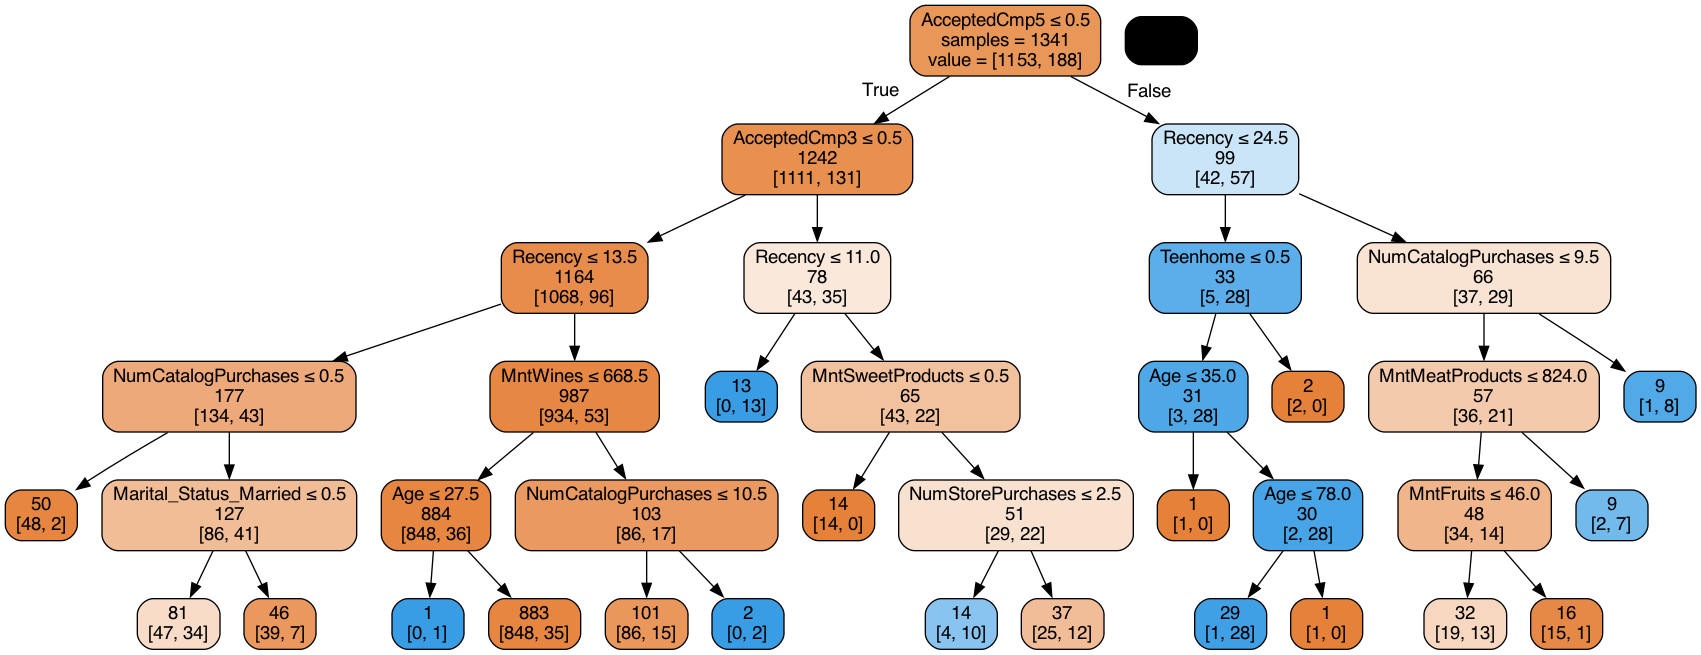

In [938]:
# Create classification tree based on the improved parameters.
bestClassTree = gridSearch.best_estimator_

# Display classification tree based on improved parameters
print('Best Classification Tree with Grid Search')
plotDecisionTree(bestClassTree, feature_names=train_X.columns)

In [939]:
# Indetify and display number of nodes in the tree
# based on grid search.
tree_nodes_grid = bestClassTree.tree_.node_count
print('Number of nodes:', tree_nodes_grid)

Number of nodes: 37


In [940]:
# Confusion matrices for grid search classification tree. 

# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, bestClassTree.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.9053)

       Prediction
Actual    0    1
     0 1145    8
     1  119   69

Validation Partition
Confusion Matrix (Accuracy 0.8402)

       Prediction
Actual   0   1
     0 730  19
     1 124  22


# Develop regression tree for the data set

In [941]:
# Improve grid search parameters by adapting grid based 
# on results from initial grid search parameters.
param_grid = {
    'max_depth': list(range(2, 10)), 
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 
                   0.004, 0.005], 
    'min_samples_split': list(range(10, 30)), 
}

# Apply GridSearchCV() fucntion for various combinations of
# DecisionTreeRegressor() new parameters. 
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

# Display best improved paramenters of regression tree. 
print()
print(f'Improved score:{gridSearch.best_score_:.4f}')
print('Improved parameters: ', gridSearch.best_params_)


Improved score:0.2024
Improved parameters:  {'max_depth': 3, 'min_impurity_decrease': 0.003, 'min_samples_split': 10}


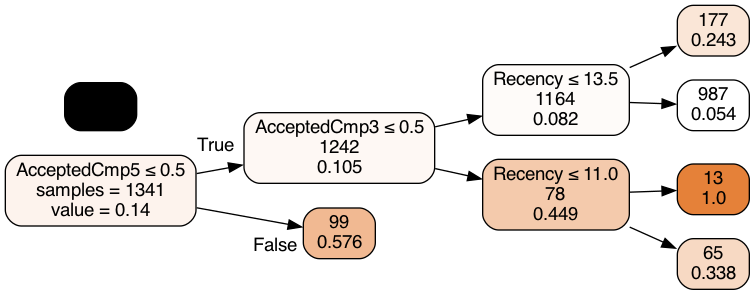

In [942]:
# Create regression tree based on the improved parameters. 
bestRegTree = gridSearch.best_estimator_

# Display regression tree bestRegTree based on the best 
# parameters from grid search.
plotDecisionTree(bestRegTree, feature_names=train_X.columns, rotate=True)

In [943]:
# Indetify and display number of nodes in the regression tree.
tree_nodes = bestRegTree.tree_.node_count
print('Number of nodes:', tree_nodes)

Number of nodes: 9


In [944]:
# Regression tree accuracy measures for training and
# validation partitions. 

# Identify and display regression tree accuracy measures 
# for training partition.
print('Accuracy Measures for Training Partition for Regression Tree')
regressionSummary(train_y, bestRegTree.predict(train_X))

# Identify and display regression tree accuracy measures 
# for validation partition.
print()
print('Accuracy Measures for Validation Partition for Regression Tree')
regressionSummary(valid_y, bestRegTree.predict(valid_X))

Accuracy Measures for Training Partition for Regression Tree

Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 0.3009
     Mean Absolute Error (MAE) : 0.1811

Accuracy Measures for Validation Partition for Regression Tree

Regression statistics

               Mean Error (ME) : 0.0246
Root Mean Squared Error (RMSE) : 0.3508
     Mean Absolute Error (MAE) : 0.2141


# KNN Model

In [945]:
from pathlib import Path # to interact with file system.

import numpy as np # for working with arrays.
import pandas as pd # for working with data frames (tables).

from sklearn.model_selection import train_test_split # for data partition.
from sklearn.metrics import r2_score # to identify r_squared for regression model.
from sklearn.linear_model import LinearRegression # for linear regression model. 
from sklearn.metrics import confusion_matrix


import statsmodels.formula.api as sm

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from mord import LogisticIT
from dmba import classificationSummary, gainsChart, liftChart

%matplotlib inline 
import matplotlib.pylab as plt # for building and showing graphs.

In [946]:
# Determine and display dimensions of data frame. 
print('Number of rows and columns in data set:', 
      marketing_df.shape )
# It has 5802 rows and 14 columns.

Number of rows and columns in data set: (2236, 30)


In [947]:
# Display the first 5 rows of the dataframe. 
marketing_df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Complain,Response,Age,Education_Basic,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,58.138,0,0,58,635,88,546,172,88,88,...,0,1,66,0,0,0,0,1,0,0
1,46.344,1,1,38,11,1,6,2,1,6,...,0,0,69,0,0,0,0,1,0,0
2,71.613,0,0,26,426,49,127,111,21,42,...,0,0,58,0,0,0,0,0,1,0
3,26.646,1,0,26,11,4,20,10,3,5,...,0,0,39,0,0,0,0,0,1,0
4,58.293,1,0,94,173,43,118,46,27,15,...,0,0,42,0,0,1,1,0,0,0


In [948]:
# fill missing values with mean income
marketing_df['Income'].fillna(marketing_df['Income'].mean(), inplace=True)

# convert income to thousands of dollars
marketing_df['Income'] /= 1000

### Removing outliers

In [949]:
# Determine and display dimensions of data frame. 
print('Number of rows and columns in data set:', 
      marketing_df.shape )

Number of rows and columns in data set: (2236, 30)


In [950]:
marketing_df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Education_Basic',
       'Education_Master', 'Education_PhD', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow'],
      dtype='object')

# KNN 

In [951]:
X = marketing_df[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 
        'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
        'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
        'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 
        'AcceptedCmp2', 'Complain', 'Age', 'Education_Basic', 'Education_Master', 'Education_PhD', 
        'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow']]
y = marketing_df['Response']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Scale the data using standard normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict the response variable for the test data
y_pred = knn.predict(X_test)


# Predict the response variable for new data
new_data = [[50000, 0, 1, 10, 200, 100, 150, 50, 30, 50, 3, 4, 2, 5, 7, 0, 1, 1, 0, 0, 0, 30, 0, 0, 1, 0, 1, 0, 1]]
new_data_df = pd.DataFrame(new_data, columns=X.columns)
new_data_normalized = scaler.transform(new_data_df)
new_prediction = knn.predict(new_data_normalized)
print(new_prediction)

[0]


In [952]:
# Identify best k value for number of nearest neighbors using validation partition.

# Develop k-NN classifier using training partition for various
# values of k and then identify accuracy score using validation
# partition. Accuracy score (accuracy) means a probability of 
# correct predictions with the k-NN classifier. 

results = []
for k in range(1, 15):
    # Train knn classifier using training partition.
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    results.append({
        'k': k,
        # For each k, identify accuracy score using validation 
        # partition.
        'Accuracy Score': accuracy_score(y_test, knn.predict(X_test))
    })

# Convert results to a pandas data frame. The smallest k value 
# with the highest accuracy is the best k to apply in k-NN 
# classifier. 
results = pd.DataFrame(results)
print(results)

     k  Accuracy Score
0    1        0.831285
1    2        0.864804
2    3        0.873743
3    4        0.860335
4    5        0.870391
5    6        0.863687
6    7        0.869274
7    8        0.864804
8    9        0.869274
9   10        0.867039
10  11        0.871508
11  12        0.865922
12  13        0.870391
13  14        0.863687


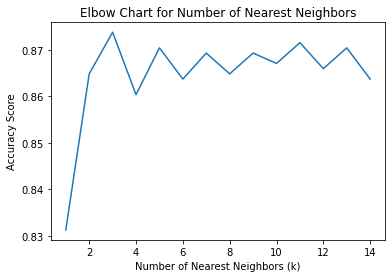

In [953]:
# Develop and display Elbow chart to compare accuracy_score with 
# number of nearest neighbors, k, from 1 to 20. 
ax = results.plot(x='k', y='Accuracy Score')
plt.xlabel('Number of Nearest Neighbors (k)')
plt.ylabel('Accuracy Score')

plt.title('Elbow Chart for Number of Nearest Neighbors')
ax.legend().set_visible(False)
plt.show()

In [954]:
X = marketing_df[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 
        'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
        'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
        'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 
        'AcceptedCmp2', 'Complain', 'Age', 'Education_Basic', 'Education_Master', 'Education_PhD', 
        'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow']]
y = marketing_df['Response']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data using standard normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict the response variable for the test data
y_pred = knn.predict(X_test)


# Predict the response variable for new data
new_data = [[50000, 0, 1, 10, 200, 100, 150, 60, 30, 100, 3, 4, 2, 5, 7, 0, 1, 1, 0, 0, 0, 30, 0, 0, 1, 0, 1, 0, 1]]
new_data_df = pd.DataFrame(new_data, columns=X.columns)
new_data_normalized = scaler.transform(new_data_df)
new_prediction = knn.predict(new_data_normalized)
print(new_prediction)

[0]


In [955]:
y_pred = knn.predict(X_test)

# Compute the accuracy of the KNN model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 86.44%


In [956]:
# Confusion matrices for network model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition for  Model')
classificationSummary(y_train, knn.predict(X_train))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition for  Model')
classificationSummary(y_test, knn.predict(X_test))

Training Partition for  Model
Confusion Matrix (Accuracy 0.9188)

       Prediction
Actual    0    1
     0 1317   26
     1  101  121

Validation Partition for  Model
Confusion Matrix (Accuracy 0.8644)

       Prediction
Actual   0   1
     0 534  25
     1  66  46


In [957]:
from pathlib import Path # to interact with file system.

import numpy as np # for working with arrays.
import pandas as pd # for working with data frames (tables).

from sklearn.model_selection import train_test_split # for data partition.
from sklearn.metrics import r2_score # to identify r_squared for regression model.
from sklearn.linear_model import LinearRegression # for linear regression model. 

import statsmodels.formula.api as sm

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from mord import LogisticIT
from dmba import classificationSummary, gainsChart, liftChart, regressionSummary


from sklearn.neural_network import MLPClassifier, MLPRegressor 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score, GridSearchCV

%matplotlib inline 
import matplotlib.pylab as plt # for building and showing graphs.

In [958]:
# Determine and display dimensions of data frame. 
print('Number of rows and columns in data set:', 
      marketing_df.shape )
# It has 5802 rows and 14 columns.

Number of rows and columns in data set: (2236, 30)


# Neural Nets based on backward elimination

In [959]:
# on the Backward Elimination results.
# Create predictors X and outcome y variables.
X = marketing_df.drop(columns=['NumCatalogPurchases', 'AcceptedCmp4', 'Response'])

y = marketing_df['Response']

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the bank_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.4, random_state=1)


# Grid search for Accidents data set.

In [960]:
# Identify grid search parameters. 
param_grid = {
    'hidden_layer_sizes': list(range(2, 20)), 
}

# Utilize GridSearchCV() to identify the best number 
# of nodes in the hidden layer. 
gridSearch = GridSearchCV(MLPClassifier(solver='lbfgs', max_iter=10000, random_state=1), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X, train_y)

# Display the best score and best parament value.
print(f'Best score:{gridSearch.best_score_:.4f}')
print('Best parameter: ', gridSearch.best_params_)

/Users/samthomas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/samthomas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/samthomas/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):


Best score:0.8866
Best parameter:  {'hidden_layer_sizes': 13}


In [961]:
# Create outcome and predictors to run neural network
# model.
# on the Backward Elimination results.
# Create predictors X and outcome y variables.
X = marketing_df.drop(columns=['NumCatalogPurchases', 'AcceptedCmp4', 'Response'])

y = marketing_df['Response']

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the bank_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.4, random_state=1)

# Use MLPCclassifier() function to train neural network model.
# Apply: 
# (a) default input layer with the number of nodes equal 
#     to number of predictor variables (27); 
# (b) single hidden layer with 7 nodes (default is 2); 
# (c) default output layer with the number nodes equal
#     to number of classes in outcome variable (1);
# (d) 'logistic' activation function;
# (e) solver = 'lbfgs', which is applied for small data 
#     sets for better performance and fast convergence. 
#     For large data sets, apply default solver = 'adam'. 
marketing_clf = MLPClassifier(hidden_layer_sizes=(7), max_iter=10000,
                activation='logistic', solver='lbfgs', random_state=1)
marketing_clf.fit(train_X, train_y)

# Display network structure with the final values of 
# intercepts (Theta) and weights (W).
print('Final Intercepts for Accidents Neural Network Model')
print(marketing_clf.intercepts_)

print()
print('Network Weights for Accidents Neural Network Model')
print(marketing_clf.coefs_)

Final Intercepts for Accidents Neural Network Model
[array([ 0.61650028,  0.20451791, -0.2183983 ,  0.10558254, 11.88068873,
       -0.25324031,  0.20458053]), array([-17.25490861])]

Network Weights for Accidents Neural Network Model
[array([[-1.37201356e-01,  7.09137967e-02, -2.29883803e-01,
        -9.10307428e-02,  1.27091489e+00, -2.77082295e-01,
        -1.44256428e-01],
       [-4.52458740e+00, -1.59414288e-01, -1.21083155e-02,
        -4.30241115e-02, -3.18468272e-02,  4.56755125e-01,
         1.70408395e-01],
       [ 2.30422785e+00,  4.81519222e+00, -3.84511745e-02,
         2.48932923e-02, -1.13841453e+01,  2.33687160e+00,
         1.35834045e-01],
       [ 6.54530421e+00,  2.28047896e+00, -9.41281035e-01,
        -3.69023519e-01, -2.06730288e-01,  4.99244093e+00,
        -3.54965210e-01],
       [-2.40886772e-01,  3.22076007e+00, -4.12642101e-01,
        -6.18749720e-01,  4.20652810e-01, -1.02535402e+00,
        -2.50091142e-01],
       [ 1.08126014e+00,  2.35329803e-01,  1

In [962]:
# Make marketing response classification for validation set 
# using marketing neural network model. 

# Use accident_clf model to classify accident severity
# for validation set.
marketing_pred = marketing_clf.predict(valid_X)

# Predict accident severity probabilities p(0), p(1),
# and p(2) for validation set.
marketing_pred_prob = np.round(marketing_clf.predict_proba(valid_X), 
                          decimals=4)

# Create data frame to display classification results for
# validation set. 
marketing_pred_result = pd.DataFrame({'Actual': valid_y, 
                'p(0)': [p[0] for p in marketing_pred_prob],
                'p(1)': [p[1] for p in marketing_pred_prob],
                
                'Classification': marketing_pred})

print('Classification for Accidents Data for Validation Partition')
print(marketing_pred_result.head(10))

Classification for Accidents Data for Validation Partition
      Actual    p(0)    p(1)  Classification
664        0  1.0000  0.0000               0
1596       0  1.0000  0.0000               0
1120       0  0.4809  0.5191               1
575        1  0.4809  0.5191               1
674        0  0.9119  0.0881               0
1815       0  1.0000  0.0000               0
2200       0  0.5580  0.4420               0
196        0  1.0000  0.0000               0
828        0  0.9119  0.0881               0
120        0  0.9496  0.0504               0


In [963]:

# Confusion matrices for Accidents neural network model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition for Neural Network Model')
classificationSummary(train_y, marketing_clf.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition for Neural Network Model')
classificationSummary(valid_y, marketing_clf.predict(valid_X))




Training Partition for Neural Network Model
Confusion Matrix (Accuracy 0.8792)

       Prediction
Actual    0    1
     0 1063   90
     1   72  116

Validation Partition for Neural Network Model
Confusion Matrix (Accuracy 0.8156)

       Prediction
Actual   0   1
     0 679  70
     1  95  51
